<a href="https://colab.research.google.com/github/nebuchadnezzarr/DL-ML/blob/master/Classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Установка библиотек
Для работы с генерацией картинок удобно использоваться функции графического построения из библиотеки opencv; для дальнейшего обучения, оценки работоспособности системы будем использовать Keras и Scikit-Learn. 
Сама библиотека Scikit-Learn содержит очень удобные для оценки metrics и confusion matrix, а также использует в своей реализации NumPy массивы, поэтому будем ставим библиотеку NumPy.

In [0]:
import numpy as np
import os                                                    
import itertools
from IPython.display import SVG
import cv2
import matplotlib.pyplot as plt                             
from PIL import Image
import pylab
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from cv2 import imshow
from google.colab.patches import cv2_imshow
import random
from random import randint

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation 
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


##Подготовка гугл диска для работы с датасетом
Датасет будет хранится и использоваться для обучения нейронной сетью на гугл диске. 
Создание папок и директорий для хранения сгенерированных изображений.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')


!mkdir /content/gdrive/'My Drive'/SET
!mkdir /content/gdrive/'My Drive'/SET/train
!mkdir /content/gdrive/'My Drive'/SET/validation

!mkdir /content/gdrive/'My Drive'/SET/train/Square
!mkdir /content/gdrive/'My Drive'/SET/validation/Square

!mkdir /content/gdrive/'My Drive'/SET/train/Circle
!mkdir /content/gdrive/'My Drive'/SET/validation/Circle

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


##Генерация изображений
Для генерирования изображений датасета используются модули рисования circle для отрисовки кругов; 
Цвет взят ультрамодный "mediumvioletred RGB (199,21,133)"  - его перегоняем в BGR (133,21,199)

In [0]:
#Набор изображений для обучения 
for i in range(200):
  randR = randint(-2, 2) #Генерим рандомные значения в заданных диапазонах
  rand = randint(-8, 8)
  rand2 = randint(-20, 20)
  img = np.zeros((64,32,3), np.uint8) #Создание матрицы из нулей заданного размера 

  img = cv2.circle(img,(16 + rand ,32 + rand2), 8 + randR, (0, 0, 255), -1);        
  img = cv2.circle(img,(16 + rand ,32 + rand2), 5 + randR, (133,21,199), -1);
  img = cv2.circle(img,(16 + rand ,32 + rand2), 2 + randR, (133,21,199), -1);

  img_flip = cv2.flip(img, flipCode=1)

  vis = np.concatenate((img, img_flip), axis=1)
  vis = cv2.GaussianBlur(vis,(11,11),0)
  
  cv2.imwrite('/content/gdrive/' + 'My Drive' + '/SET' + '/train'+ '/Circle' + '/circle'+ str(i) +'.jpg', vis) #сохраняем полученные круги 
  
  
for i in range(200):
  img2 = np.zeros((64, 64, 3), np.uint8) #Аналогично для квадрата

  for x in range(64):
    for y in range(64):
        rand1 = randint(-20, 20)
        img2[x,y]=[133, 21, 199 + rand1]
  
  cv2.imwrite('/content/gdrive/' + 'My Drive' + '/SET' + '/train' + '/Square' + '/square'+ str(i) +'.jpg', img2) #сохраняем полученные квадраты


for i in range(20):
  randR = randint(-2, 2)
  rand = randint(-8, 8)
  rand2 = randint(-20, 20)
  img = np.zeros((64,32,3), np.uint8)
  
  img = cv2.circle(img,(16 + rand ,32 + rand2), 8 + randR, (0, 0, 255), -1);
  img = cv2.circle(img,(16 + rand ,32 + rand2), 5 + randR, (133,21,199), -1);
  img = cv2.circle(img,(16 + rand ,32 + rand2), 2 + randR, (133,21,199), -1);

  img_flip = cv2.flip(img, flipCode=1)

  vis = np.concatenate((img, img_flip), axis=1)
  vis = cv2.GaussianBlur(vis,(11,11),0)
  
  cv2.imwrite('/content/gdrive/' + 'My Drive' + '/SET' + '/validation' + '/Circle' + '/circleV' + str(i) + '.jpg', vis)
  
for i in range(20):
  img2 = np.zeros((64, 64, 3), np.uint8)

  for x in range(64):
    for y in range(64):
        rand1 = randint(-20, 20)
        img2[x,y]=[133, 21, 199 + rand1]
  
  cv2.imwrite('/content/gdrive/' + 'My Drive' + '/SET' + '/validation' + '/Square' + '/squareV' + str(i) +'.jpg', img2)

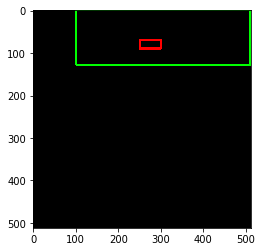

In [0]:
img = np.zeros((512,512,3), np.uint8)
cv2.rectangle(img,(100,0),(510,128),(0,255,0),3)
cv2.rectangle(img,(250, 70), (300,90), (255,0,0),3)

plt.imshow(img)
plt.show()

##Параметры обучения
В данном блоке указываем входные параметры, создаем списки бачей для тренировки и их параметры

In [0]:
img_width, img_height = 64, 64 # Размеры изображения
# Размерность тензора на основе изображения для входных данных в нейронную сеть 
input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator( #создание объекта, задающего параметры аргументации для тренировки            
            rescale = 1./255) #В нейронах будут хранится строго числа от 1 до 255


train_generator = train_datagen.flow_from_directory(   #создание списка бачей для тренировки    
            '/content/gdrive/My Drive/SET/train',      #место хранения тренировочного сета
            target_size = (img_width, img_height),        #размер входного изображения
            color_mode = 'rgb',        #принимаем на вход цветные изображения
            batch_size = 10,           #Количество изображений в одном пакете 
            class_mode = 'binary'                   #бинарная классификация (2 класса)
           )                                              


test_datagen = ImageDataGenerator( #создание объекта, задающего параметры аугментации для валидации         
            rescale = 1./255)


test_generator = test_datagen.flow_from_directory( #создание списка бачей для валидации        
            '/content/gdrive/My Drive/SET/validation',    #место хранения валидационного сета
            target_size = (img_width, img_height), 
            color_mode = 'rgb', 
            batch_size = 10,
            class_mode = 'binary',
            shuffle=False
            )

Found 400 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


##Модель 
Тип расстановки слоев (последовательный), перечисление и задание параметров слоев.
Оптимизатор градиентного спуска типа Адам, а такде вывод содержимого модели и ее архитектуры. 
Входной слой содержит изображения
Maxpooling слой - выполняет процесс дискретизации на основе выборке, для того чтобы уменьшить входную выборку. Это делается для того,
чтобы уменьшить размерность (число входных параметров), а также учесть допущения относительно свойств в выбранном фрагменте, а также
для уменьшения вычислительных затрат. Осуществляется путем применения фильтра max к выбранному фрагменту. 

In [0]:
model = Sequential()                                                                

model.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))         #входной слой
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2))) #Maxpooling слой 

model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())                                                                   #полносвязный слой

model.add(Dense(units = 128, activation = 'relu'))                                     
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))                                    #выходной слой

Adam = keras.optimizers.Adam(lr = 0.0001)                                              #Алгоритм оптимизации градиентного спуска Адам
model.compile(optimizer = Adam, loss = 'binary_crossentropy', metrics = ['accuracy'])  #Компиляция модели

model.summary() #вывод содержимого сети


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
##Архитектура сети 

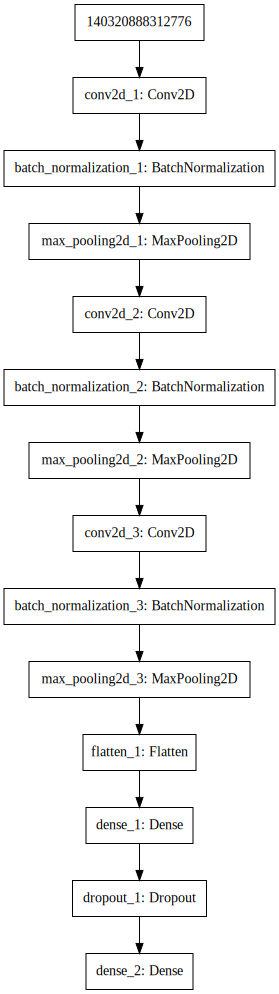

In [0]:
SVG(model_to_dot(model).create(prog='dot', format='svg')) 

##тренировка сети 

In [0]:
#Функция обучения сети
model.fit_generator(train_generator, steps_per_epoch = 40, validation_data = test_generator, validation_steps = 4, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
40/40 [==============================] - 9s 236ms/step - loss: 0.1363 - acc: 0.9450 - val_loss: 4.5062e-05 - val_acc: 1.0000
Epoch 2/20
40/40 [==============================] - 8s 200ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 2.0467e-05 - val_acc: 1.0000
Epoch 3/20
40/40 [==============================] - 8s 204ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.8155e-05 - val_acc: 1.0000
Epoch 4/20
40/40 [==============================] - 8s 201ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.7410e-05 - val_acc: 1.0000
Epoch 5/20
40/40 [==============================] - 8s 200ms/step - loss: 4.5338e-04 - acc: 1.0000 - val_loss: 1.6628e-05 - val_acc: 1.0000
Epoch 6/20
40/40 [==============================] - 8s 199ms/step - loss: 0.0025 - acc: 0.9975 - val_loss: 8.6030e-05 - val_acc: 1.0000
Epoch 7/20
40/40 [==============================] - 8s 200ms/step - loss: 6.3137e-04 - acc: 1.0000 - val_loss: 3.4087e-05 - val_acc:

##Матрица ошибок

In [0]:
Y_pred = model.predict_generator(test_generator, steps = 4)
y_pred = np.round(Y_pred, 0)
cm = confusion_matrix(test_generator.classes, y_pred)
target_names = ['Circle', 'Square']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Circle       1.00      1.00      1.00        20
      Square       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



##Визуализация матрицы

Confusion matrix, without normalisation


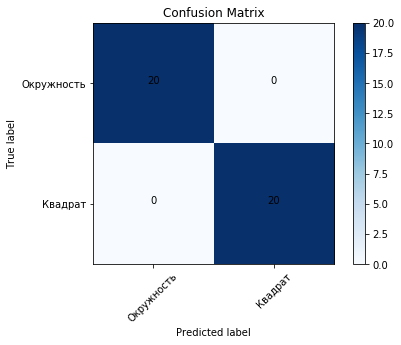

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalisation')
    
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
          horizontalalignment="center",
          color="black" if cm[i, j] > thresh else "black")
           
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
cm_plot_labels = ['Окружность', 'Квадрат']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')


In [0]:
!mkdir -p /content/gdrive/'My Drive'/SET/test 
addr = '/content/gdrive/' + 'My Drive' + '/SET/test/'
def one_predict(i):
  pic =  addr + str(i) + '.jpg'
  
  img = plt.imread(pic)
  plt.imshow(img)
  img = np.expand_dims(img, 0)

  if np.round(model.predict(img)) == 0:
    print('Circle')
  else:
    print('Square')

Square


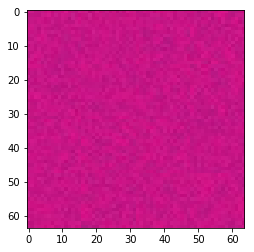

In [0]:
one_predict(1)

Circle


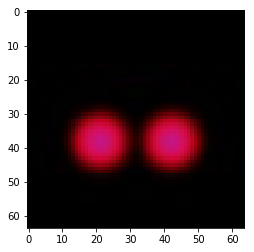

In [0]:
one_predict(2)

Circle


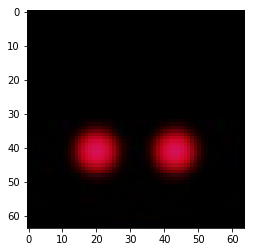

In [0]:
one_predict(3)

##Сохранение весов и сети

In [0]:
#Сохранение весов и сети
addr = '/content/gdrive/' + 'My Drive' + '/SET/weightsBA.h5'
addr1 = '/content/gdrive/' + 'My Drive' + '/SET/netBA.h5'
!rm /content/gdrive/'My Drive'/SET/netBA.h5
!rm /content/gdrive/'My Drive'/SET/weightsBA.h5

model.save_weights(addr)
model.save(addr1)